Alternance Readiness Index Dashboard

Ce projet vise à créer un indice de préparation à l’alternance basé sur des données mesurables.
Il permet de transformer des éléments qualitatifs en indicateurs quantitatifs.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")


 Description des données

Le dataset simule 50 étudiants en formation data suivis sur 6 mois.

Les indicateurs incluent :

Projets techniques réalisés

Activité GitHub

Présence LinkedIn

Candidatures envoyées

Heures de formation

In [8]:
np.random.seed(42)

students = [f"DS{100+i}" for i in range(50)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun"]

data = []

for student in students:
    base_skill = np.random.randint(1,5)

    for month in months:
        data.append({
            "student_id": student,
            "month": month,
            "python_projects": base_skill + np.random.randint(0,3),
            "sql_projects": base_skill + np.random.randint(0,2),
            "github_commits": np.random.randint(20,200),
            "linkedin_posts": np.random.randint(0,10),
            "applications_sent": np.random.randint(5,40),
            "training_hours": np.random.randint(20,120)
        })

df = pd.DataFrame(data)
df.head()


,student_id,month,python_projects,sql_projects,github_commits,linkedin_posts,applications_sent,training_hours
0,DS100,Jan,3,3,126,7,25,102
1,DS100,Feb,5,3,107,4,28,22
2,DS100,Mar,4,3,21,7,34,57
3,DS100,Apr,4,4,40,0,16,77
4,DS100,May,4,3,108,0,31,78


Construction des indicateurs

Trois scores ont été définis :

 Score technique

Basé sur projets et activité GitHub.

 Score visibilité

Mesure la présence professionnelle.

 Score motivation

Mesure l’engagement dans la recherche d’alternance.

In [9]:
df["technical_score"] = (
    df["python_projects"] * 8 +
    df["sql_projects"] * 7 +
    df["github_commits"] * 0.1
)

df["visibility_score"] = df["linkedin_posts"] * 5

df["motivation_score"] = (
    df["applications_sent"] * 2 +
    df["training_hours"] * 0.3
)

df["readiness_score"] = (
    df["technical_score"] * 0.5 +
    df["visibility_score"] * 0.2 +
    df["motivation_score"] * 0.3
)

df.head()


,student_id,month,python_projects,sql_projects,github_commits,linkedin_posts,applications_sent,training_hours,technical_score,visibility_score,motivation_score,readiness_score
0,DS100,Jan,3,3,126,7,25,102,57.6,35,80.6,59.98
1,DS100,Feb,5,3,107,4,28,22,71.7,20,62.6,58.63
2,DS100,Mar,4,3,21,7,34,57,55.1,35,85.1,60.08
3,DS100,Apr,4,4,40,0,16,77,64.0,0,55.1,48.53
4,DS100,May,4,3,108,0,31,78,63.8,0,85.4,57.52


KPI GLOBAUX

Ces KPI permettent d’avoir une vision globale du niveau de préparation des étudiants.

In [10]:
avg_readiness = df["readiness_score"].mean()
avg_tech = df["technical_score"].mean()
avg_motivation = df["motivation_score"].mean()

print("Score moyen :", round(avg_readiness,2))
print("Score technique :", round(avg_tech,2))
print("Score motivation :", round(avg_motivation,2))


Score moyen : 53.39
Score technique : 57.62
Score motivation : 66.96


Histogramme

Cet histogramme montre la répartition des niveaux de préparation parmi les étudiants.

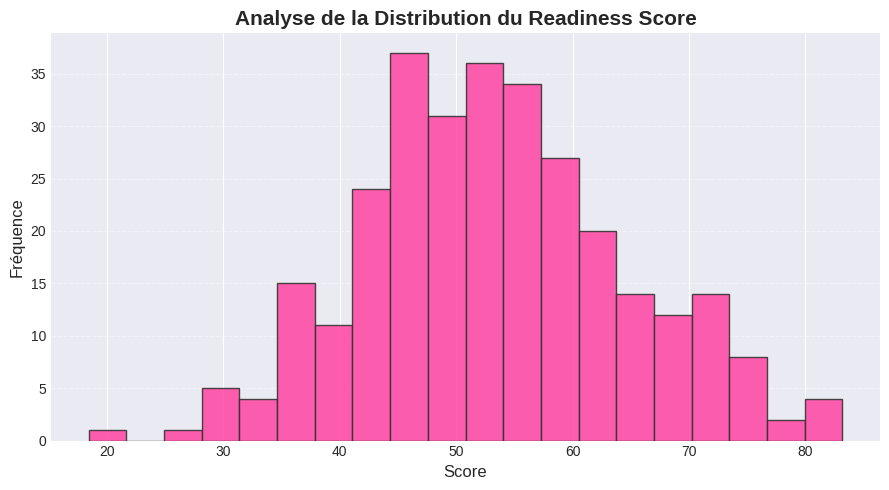

In [20]:
plt.figure(figsize=(9,5))

plt.hist(
    df["readiness_score"],
    bins=20,
    color="#FF4DA6",
    edgecolor="#333333",
    alpha=0.9
)

plt.title("Analyse de la Distribution du Readiness Score",
          fontsize=15, fontweight="bold")

plt.xlabel("Score", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()





Classement des étudiants

Ce graphique présente les étudiants ayant les meilleurs scores.

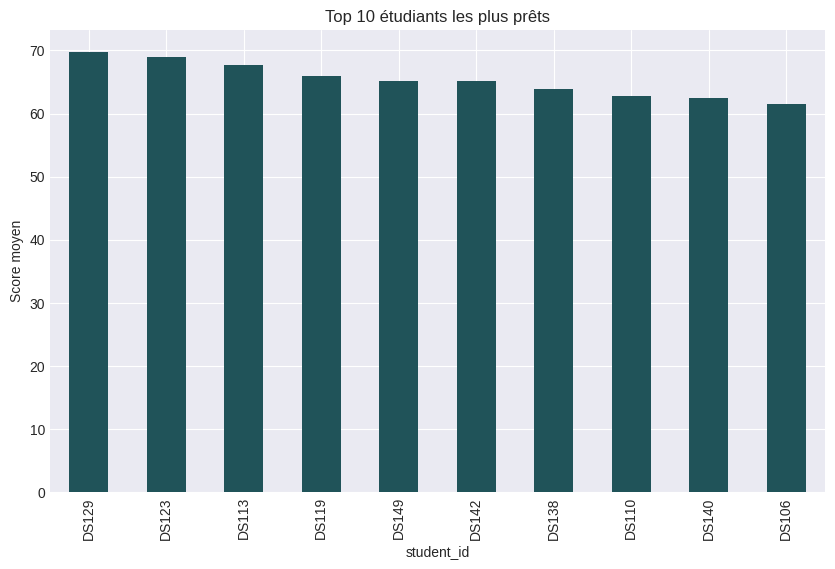

In [13]:
top_students = df.groupby("student_id")["readiness_score"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_students.plot(kind="bar", color="#205359")

plt.title("Top 10 étudiants les plus prêts")
plt.ylabel("Score moyen")

plt.show()


Analyse des facteurs

Ce graphique analyse la relation entre compétences techniques et motivation.

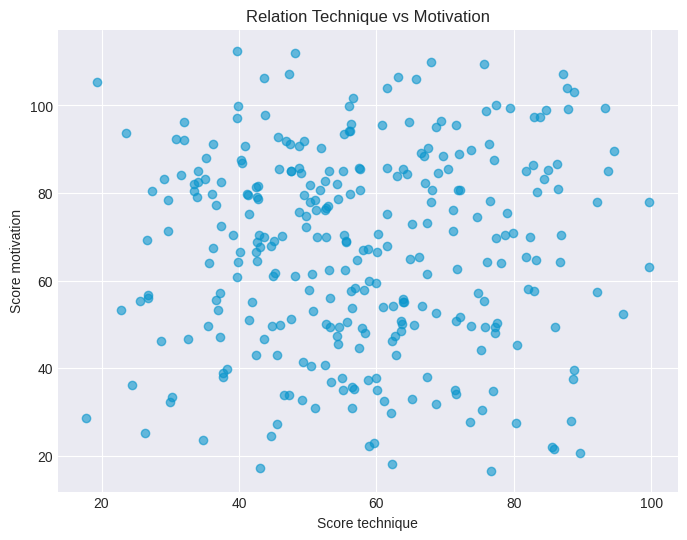

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(df["technical_score"], df["motivation_score"], color="#0895CC", alpha=0.6)

plt.title("Relation Technique vs Motivation")
plt.xlabel("Score technique")
plt.ylabel("Score motivation")

plt.show()


Progression dans le temps

Ce graphique permet de suivre l’évolution du score d’un étudiant.

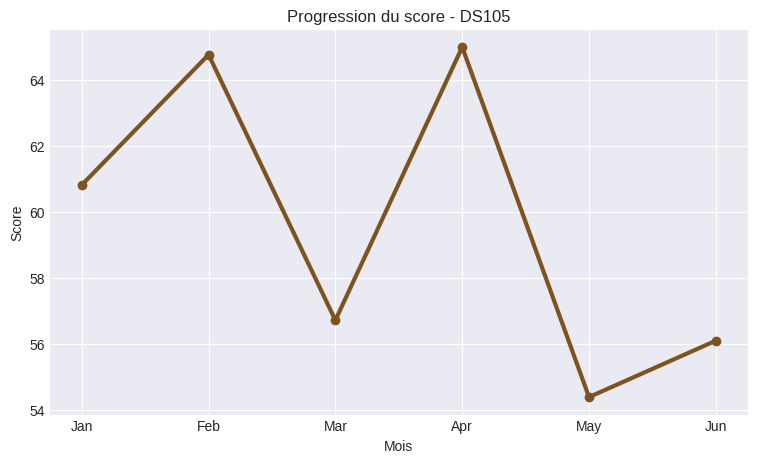

In [18]:
student = "DS105"
student_data = df[df["student_id"] == student]

plt.figure(figsize=(9,5))

plt.plot(
    student_data["month"],
    student_data["readiness_score"],
    marker="o",
    linewidth=3,
    color="#7D5320"
)

plt.title(f"Progression du score - {student}")
plt.xlabel("Mois")
plt.ylabel("Score")

plt.show()
